<a href="https://colab.research.google.com/github/LavanyaMano/Homework2_stock_prediction/blob/master/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import math
import numpy as np
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


from sklearn import linear_model



In [280]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 9, 4)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,205.529999
2019-08-29,209.320007,206.660004,208.500000,209.009995,20990500.0,209.009995
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000.0,205.699997
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,209.190002


In [281]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100, min_periods=1).mean()
print(mavg)


Date
2018-01-02    167.701889
2018-01-03    167.687279
2018-01-04    167.942022
2018-01-05    168.548862
2018-01-08    168.786407
2018-01-09    168.941526
2018-01-10    169.046759
2018-01-11    169.246161
2018-01-12    169.597043
2018-01-16    169.790128
2018-01-17    170.205651
2018-01-18    170.564899
2018-01-19    170.808972
2018-01-22    170.916649
2018-01-23    171.012565
2018-01-24    170.924906
2018-01-25    170.669460
2018-01-26    170.464030
2018-01-29    170.098327
2018-01-30    169.721004
2018-01-31    169.400941
2018-02-01    169.125463
2018-02-02    168.565794
2018-02-05    167.890101
2018-02-06    167.523141
2018-02-07    167.053730
2018-02-08    166.460800
2018-02-09    165.976204
2018-02-12    165.737384
2018-02-13    165.567597
                 ...    
2019-07-24    193.117685
2019-07-25    193.434926
2019-07-26    193.762515
2019-07-29    194.119453
2019-07-30    194.487473
2019-07-31    194.893862
2019-08-01    195.194881
2019-08-02    195.432020
2019-08-05    195.55

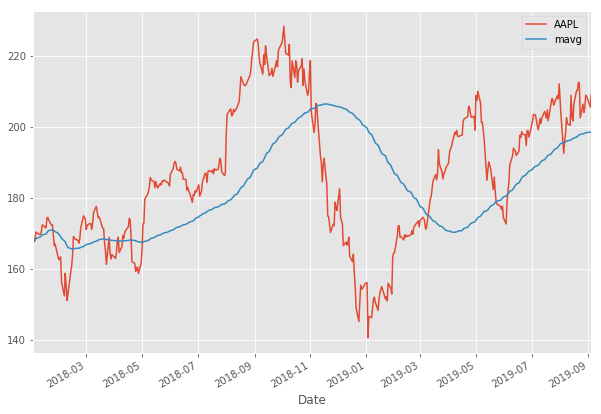

In [282]:
# matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(10, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

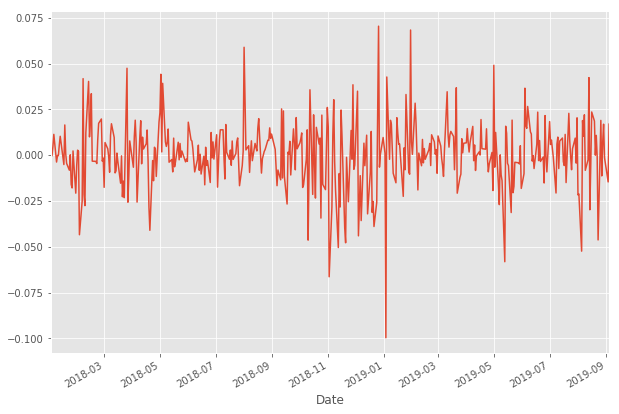

In [283]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [284]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
print(dfcomp)

Symbols           AAPL         GE         GOOG         IBM        MSFT
Date                                                                  
2018-01-02  167.701889  16.778189  1065.000000  142.483978   83.539680
2018-01-03  167.672668  16.936827  1082.479980  146.400558   83.928474
2018-01-04  168.451508  17.291428  1086.400024  149.365707   84.667145
2018-01-05  170.369385  17.300758  1102.229980  150.095444   85.716881
2018-01-08  169.736588  17.058138  1106.939941  151.000687   85.804337
2018-01-09  169.717117  17.319418  1106.260010  151.333221   85.746025
2018-01-10  169.678162  17.664688  1102.609985  151.656525   85.357239
2018-01-11  170.641968  17.748676  1105.520020  151.675003   85.609947
2018-01-12  172.404099  17.506050  1122.260010  150.695847   87.087334
2018-01-16  171.527893  16.992813  1121.760010  151.351700   85.872368
2018-01-17  174.360886  16.190296  1131.979980  155.785538   87.612183
2018-01-18  174.516632  15.649066  1129.790039  156.219681   87.573303
2018-0

In [285]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()

print(corr)

Symbols      AAPL        GE      GOOG       IBM      MSFT
Symbols                                                  
AAPL     1.000000  0.290243  0.633630  0.491423  0.682769
GE       0.290243  1.000000  0.240979  0.342738  0.247626
GOOG     0.633630  0.240979  1.000000  0.496900  0.750221
IBM      0.491423  0.342738  0.496900  1.000000  0.581685
MSFT     0.682769  0.247626  0.750221  0.581685  1.000000


Text(0, 0.5, 'Returns GE')

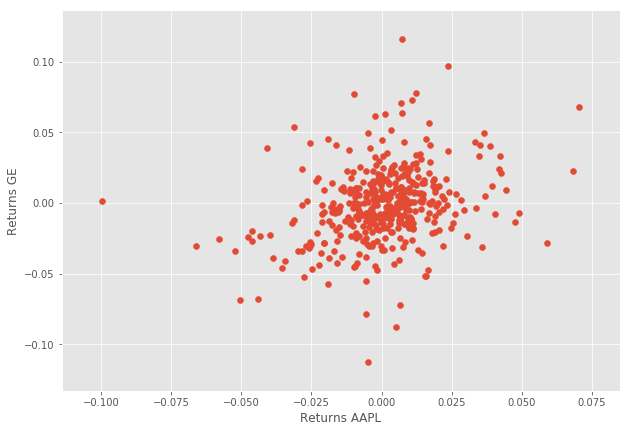

In [286]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

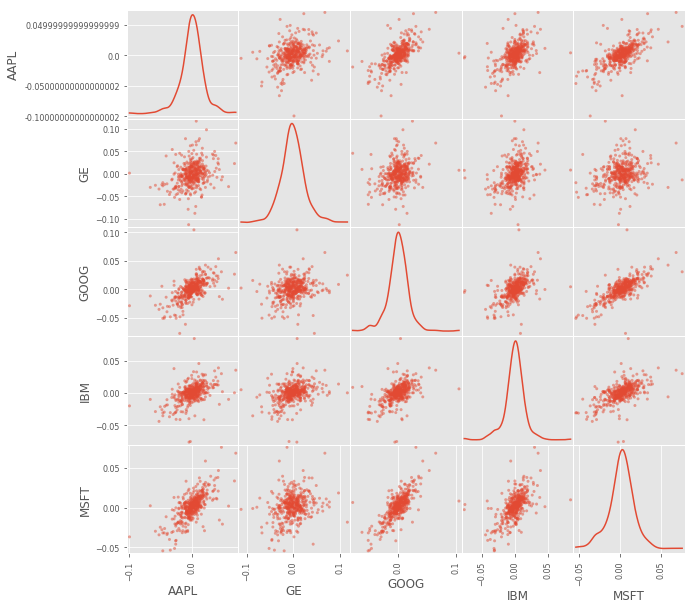

In [287]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));


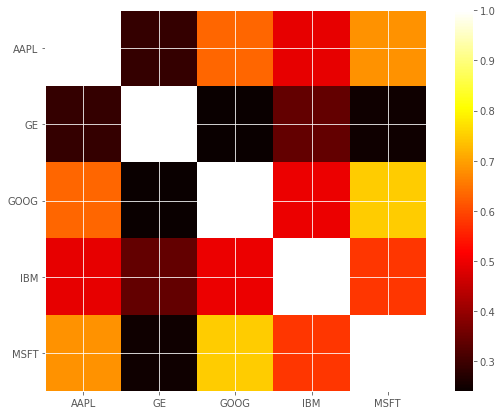

In [288]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

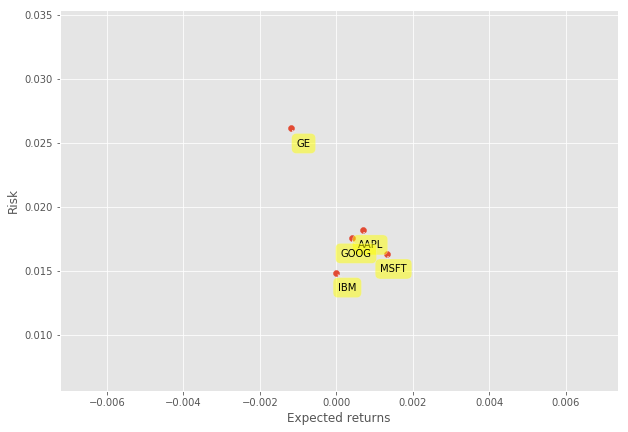

In [289]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns') 
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [290]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

print(dfreg)

             Adj Close      Volume    HL_PCT  PCT_change
Date                                                    
2018-01-02  167.701889  25555900.0  1.764779    1.234127
2018-01-03  167.672668  29517900.0  1.503801   -0.173885
2018-01-04  168.451508  22434600.0  0.803329    0.283995
2018-01-05  170.369385  23660000.0  1.325710    0.899445
2018-01-08  169.736588  20567800.0  0.963584    0.000000
2018-01-09  169.717117  21584000.0  0.946477   -0.126039
2018-01-10  169.678162  23959900.0  0.745885    0.652570
2018-01-11  170.641968  18667700.0  0.570516    0.395213
2018-01-12  172.404099  25418100.0  0.965615    0.516519
2018-01-16  171.527893  29565900.0  1.844600   -0.961209
2018-01-17  174.360886  34386800.0  2.333888    1.674716
2018-01-18  174.516632  31193400.0  1.032024   -0.061326
2018-01-19  173.737839  32425100.0  1.215958   -0.083978
2018-01-22  172.316452  27108600.0  0.666663   -0.169206
2018-01-23  172.355392  32689100.0  1.479889   -0.146650
2018-01-24  169.610016  5110510

In [0]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))



# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)


# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]


# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]



In [292]:
X_train, y_train = X,y

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)


#LASSO
clflas = linear_model.Lasso()
clflas.fit(X_train, y_train)

#Bayseian Ridge
clfbay = linear_model.BayesianRidge()
clfbay.fit(X_train, y_train)



BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [293]:
X_test, y_test = X,y
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)
confidencelas = clflas.score(X_test, y_test)
confidencebay = clfbay.score(X_test, y_test)


confidencekr = clf.score(X_test, y_test)

print('Reg confidence : ', confidencereg)
print('Poly2 confidence : ', confidencepoly2)
print('Poly3 confidence : ', confidencepoly3)
print('KNN confidence : ', confidenceknn)
print('LASSO confidence : ', confidencelas)
print('Baysien confidence : ', confidencebay)


Reg confidence :  0.8758199982290286
Poly2 confidence :  0.8897304520968369
Poly3 confidence :  0.896701666442281
KNN confidence :  0.9334917333736685
LASSO confidence :  0.870734803505763
Baysien confidence :  0.8758182609012585


In [294]:
forecast_set_reg = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan

print(forecast_set_reg)

[205.59167625 208.54535534 208.7448697  205.84884726 208.76252289]


In [295]:
forecast_set_p2 = clfpoly2.predict(X_lately)
dfreg['Forecast'] = np.nan

print(forecast_set_p2)

[208.29161528 210.09884895 211.45778927 208.09396051 210.34668569]


In [296]:
forecast_set_p3 = clfpoly3.predict(X_lately)
dfreg['Forecast'] = np.nan

print(forecast_set_p3)

[207.98953365 210.35085725 211.73430519 208.37564426 210.71698254]


In [297]:
forecast_set_knn = clfknn.predict(X_lately)
dfreg['Forecast'] = np.nan

print(forecast_set_knn)

[204.40836334 220.58205414 199.07639313 210.94664764 220.58205414]


In [298]:
forecast_set_las = clflas.predict(X_lately)
dfreg['Forecast'] = np.nan

print(forecast_set_las)

[203.97755751 206.96763228 206.72686227 204.06170737 207.15559558]


In [299]:
forecast_set_bay = clfbay.predict(X_lately)
dfreg['Forecast'] = np.nan

print(forecast_set_bay)

[205.57065981 208.51806635 208.71622188 205.82531608 208.73596557]


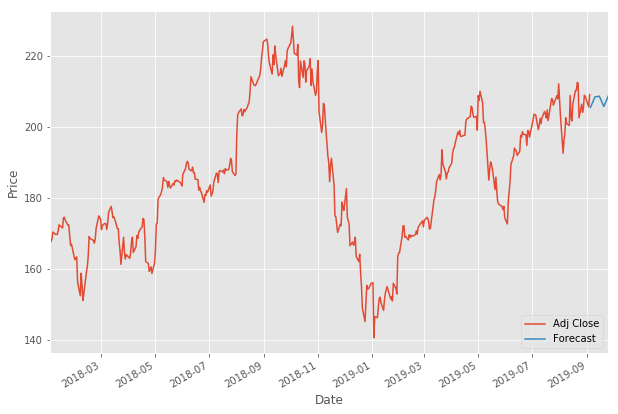

In [300]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set_reg:
    next_date = next_unix
    next_unix += datetime.timedelta(days=5)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

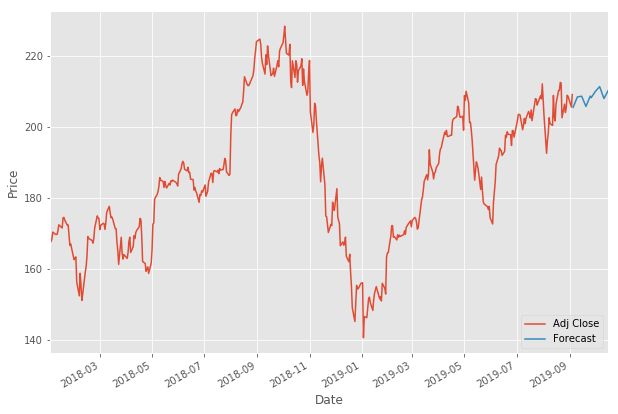

In [301]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set_p2:
    next_date = next_unix
    next_unix += datetime.timedelta(days=5)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

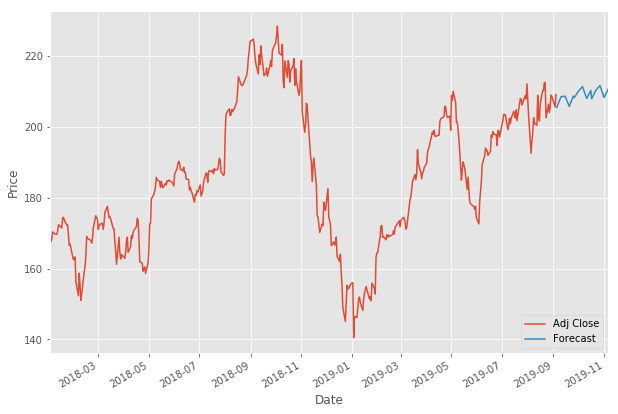

In [302]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set_p3:
    next_date = next_unix
    next_unix += datetime.timedelta(days=5)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

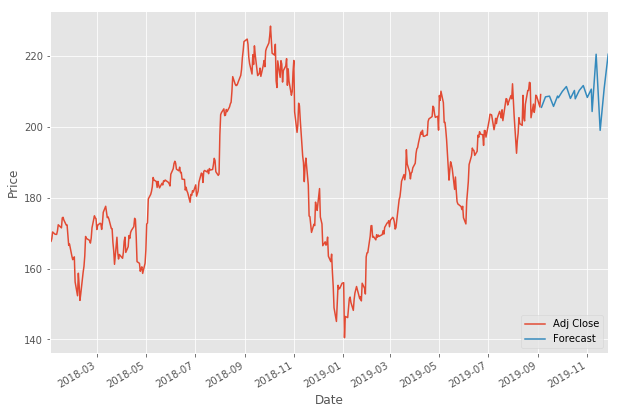

In [303]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set_knn:
    next_date = next_unix
    next_unix += datetime.timedelta(days=5)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

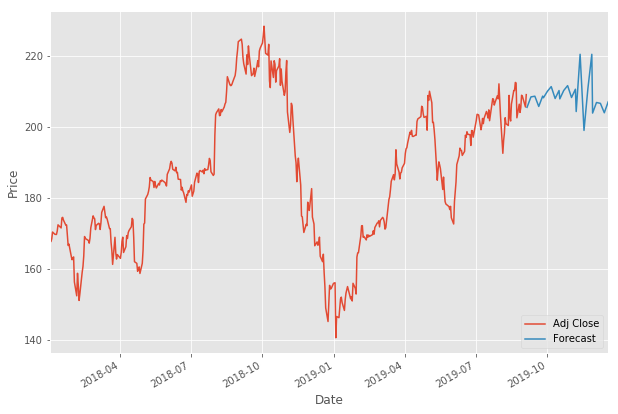

In [304]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set_las:
    next_date = next_unix
    next_unix += datetime.timedelta(days=5)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()